In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#make grid for vectors
lims = [-10,10]
dim = 20

x,y = np.meshgrid(np.linspace(lims[0],lims[1],dim),np.linspace(lims[0],lims[1],dim))

In [3]:
def clockwise_field(x,y):
    return y,-x

In [4]:
#basic forward Euler
def forward_euler(deriv_func, x, y, dt):
    delta = deriv_func(x,y)
    return x + delta[0] * dt, y + delta[1] * dt

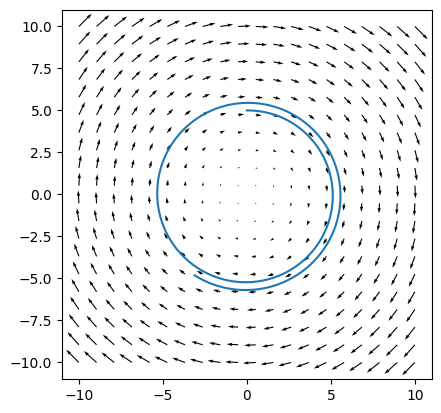

In [5]:
#Adaptive Forward Euler Simulation
#define simulation
timestep = 0.1
stop_time = 10
state = [0,5]
time = 0
error_tolerance = 1e-3
function_evals = 0

#define outputs
x_out_fe = [state[0]]
y_out_fe = [state[1]]
error = [0]
sim_time = [0]
dt_correction = [0]
steps = [timestep]

# Run simulation
while time <= stop_time:
    state_a = forward_euler(clockwise_field,state[0],state[1],timestep) # state_a is a single forward timestep
    state_b = forward_euler(clockwise_field,state[0],state[1],timestep/2) # state_b is two forward half timesteps
    state_b = forward_euler(clockwise_field,state_b[0],state_b[1],timestep/2)
    
    function_evals += 3
    
    
    #calculate accumulated error using L2 Norm
    norm_a = np.sqrt(state_a[0]**2 + state_a[1]**2)
    norm_b = np.sqrt(state_b[0]**2 + state_b[1]**2)
    err = np.abs(norm_a - norm_b)
    
    #calculate new timestep value
    timestep_correction = np.sqrt(error_tolerance/err)
    dt_correction.append(timestep_correction)
    timestep = timestep * timestep_correction
    
    # try again with the new timestep
    if err > error_tolerance:
        continue;
    
    #Perform forward euler
    state = forward_euler(clockwise_field,state[0],state[1],timestep)
    function_evals += 1
    
    #save outputs
    x_out_fe.append(state[0])
    y_out_fe.append(state[1])
    sim_time.append(time)
    steps.append(timestep)
    error.append(err)
    
    time += timestep
    
# plot output
plt.plot(x_out_fe,y_out_fe)
u,v = clockwise_field(x,y)
plt.quiver(x,y,u,v)
ax = plt.gca()
ax.set_aspect('equal')
plt.show()

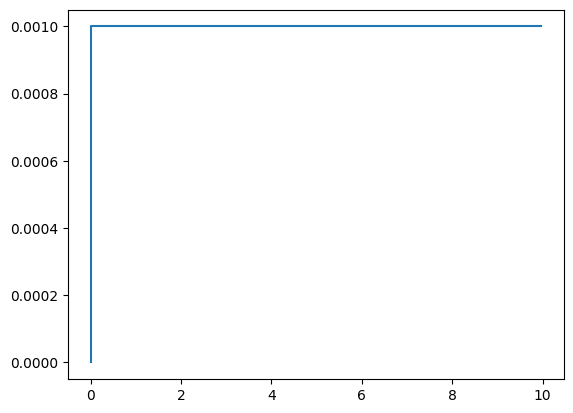

In [6]:
# plot the error 
plt.plot(sim_time, error)

In [7]:
function_evals

5691

Text(0.5, 0, 'simulation time')

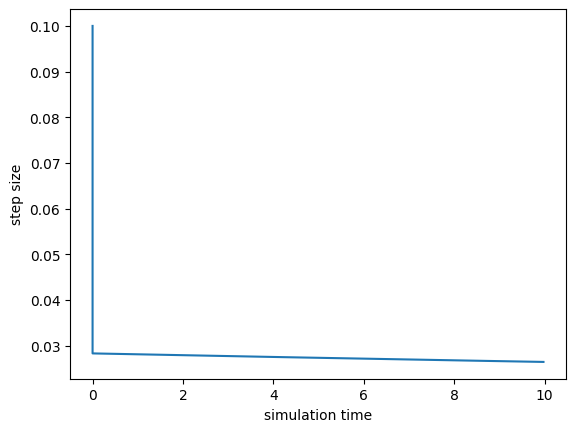

In [8]:
plt.plot(sim_time, steps)
plt.ylabel('step size')
plt.xlabel('simulation time')

In [9]:
#exponential decay function
def exp_decay(x,y):
    k = 2
    return x, -k*y

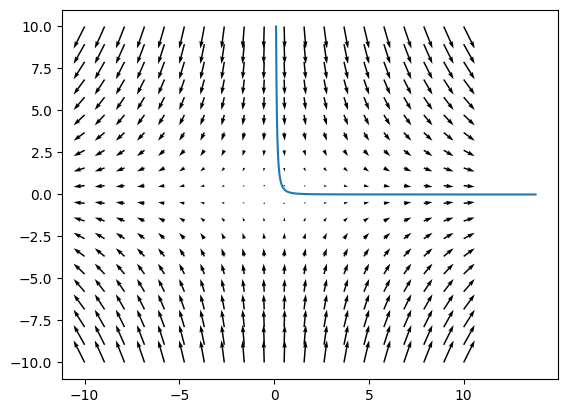

In [10]:
#Adaptive Forward Euler Exponential Decay Simulation
#define simulation
timestep = 0.9
stop_time = 5
state = [0.1,10]
time = 0
error_tolerance = 1e-3
function_evals = 0

#define outputs
x_out_fe = [state[0]]
y_out_fe = [state[1]]
error = [0]
sim_time = [0]
dt_correction = [0]
steps = [timestep]

# Run simulation
while time <= stop_time:
    state_a = forward_euler(exp_decay,state[0],state[1],timestep) # state_a is a single forward timestep
    state_b = forward_euler(exp_decay,state[0],state[1],timestep/2) # state_b is two forward half timesteps
    state_b = forward_euler(exp_decay,state_b[0],state_b[1],timestep/2)
    
    function_evals += 3
    
    
    #calculate accumulated error using L2 Norm
    norm_a = np.sqrt(state_a[0]**2 + state_a[1]**2)
    norm_b = np.sqrt(state_b[0]**2 + state_b[1]**2)
    err = np.abs(norm_a - norm_b)
    
    #calculate new timestep value
    timestep_correction = np.sqrt(error_tolerance/err)
    dt_correction.append(timestep_correction)
    timestep = timestep * timestep_correction
    
    # try again with the new timestep
    if err > error_tolerance:
        continue;
    
    #Perform forward euler
    state = forward_euler(exp_decay,state[0],state[1],timestep)
    function_evals += 1
    
    #save outputs
    x_out_fe.append(state[0])
    y_out_fe.append(state[1])
    sim_time.append(time)
    steps.append(timestep)
    error.append(err)
    
    time += timestep
    
# plot output
plt.plot(x_out_fe,y_out_fe)
u,v = exp_decay(x,y)
plt.quiver(x,y,u,v)
ax = plt.gca()
ax.set_aspect('equal')
plt.show()

Text(0.5, 0, 'simulation time')

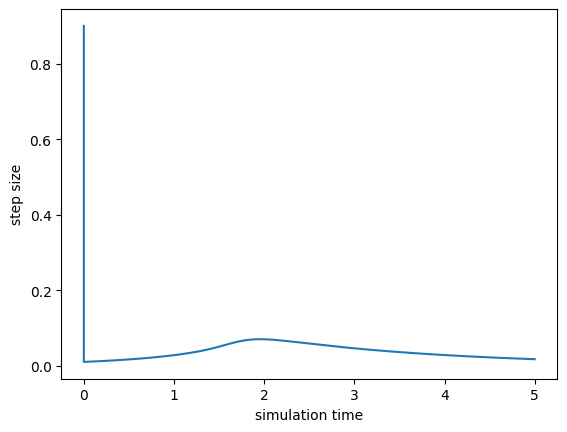

In [11]:
plt.plot(sim_time, steps)
plt.ylabel('step size')
plt.xlabel('simulation time')

In [12]:
function_evals

1542